# Desafio Universidade dos Dados – O que é considerado "ser americano" para o eleitor dos EUA? 🦅

![animerican](https://api-club-file.cb.hotmart.com/public/v5/files/e2360e90-e9da-4647-8e68-92247dfbe238)

# 1. Introdução e contexto 

FiveThirthyEight é um site norte-americano focado em análise de pesquisas de opinião, politica, economia e esportes fundado por Nate Silver. O projeto é baseado na matéria [Why Many Americans Don't Vote](https://projects.fivethirtyeight.com/non-voters-poll-2020-election/) escrita por Amelia Thomson-DeVeaux, Jasmine Mithani e Lara Bronner, e com dados disponibilizados no [Github](https://github.com/fivethirtyeight/data/tree/master/non-voters), e busca responder algumas questões divididas em quatro partes:

### Parte 1 - O público da pesquisa

- Qual o perfil da amostra analisada? Verifique a distribuição de idade, gênero, raça, nível educacional e salarial.
- Assumindo que a amostra representa adequadamente a população americana, qual a raça que possui maior poder aquisitivo? E menor?
- Ainda assumindo que temos uma amostra representativa, podemos dizer que nível educacional e poder aquisitivo estão correlacionados?

### Parte 2 - O que é considerado ser um bom americano
- Um nível educacional maior implica em maior responsabilidade em relação a votar?
- Dentre os não-brancos, o que é mais importante para ser um bom americano: votar em eleições, demonstrar a bandeira americana ou apoiar o exército? Existe uma diferença na preferência de não-brancos de maior poder aquisitivo vs menor poder aquisitivo?
- Considerando que respeitar a opinião dos outros (Q2_8) é um indício de tolerância, ao compararmos as gerações de 18-30 anos, 31-50 anos e +51, qual é a mais tolerante e a menos tolerante?

### Parte 3 - Escolhas partidárias 
- Qual escolha partidária, incluindo pessoas sem partido (Q30), possui eleitores mais jovens? E qual possui mais mulheres como apoiadoras?
- Qual o perfil do público sem partido (independent ou no preference), em termos de idade e gênero? E dos republicanos? E dos democratas? 
- Existe uma correlação entre idade e propensão a votos (voter_category)?

### Parte 4 - Estratégias eleitorais 
- Se você fizesse parte da equipe de marketing do partido republicano, qual público você deveria mirar para atrair mais votos para o partido?

# 2. Preparando o ambiente
## 2.1. Importação das bibliotecas Python e carregamento dos dados

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Análise Exploratória de Dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo

# Configurações do notebook
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)

In [2]:
df = pd.read_csv("../data/raw/nonvoters_data.csv")

## 2.2. Qualidade dos dados 

In [3]:
print(f"O dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")
print(f"Possui {len(df.select_dtypes(include = 'number').columns.to_list())} colunas numéricas.")
print(f"Possui {len(df.select_dtypes(include = 'object').columns.to_list())} colunas categóricas.")

O dataset tem 5836 linhas e 119 colunas.
Possui 114 colunas numéricas.
Possui 5 colunas categóricas.


In [4]:
df.head()

,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,Q2_10,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q4_1,...,Q29_1,Q29_2,Q29_3,Q29_4,Q29_5,Q29_6,Q29_7,Q29_8,Q29_9,Q29_10,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
0,470001,0.7516,1,1,1,2,4,1,4,2,2,4,2,1,1,4,4,3,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1.0,NaN,73,College,White,Female,$75-125k,always
1,470002,1.0267,1,1,2,2,3,1,1,2,1,1,3,3,3,4,3,3,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,1.0,90,College,White,Female,$125k or more,always
2,470003,1.0844,1,1,1,2,2,1,1,2,1,4,3,2,2,3,3,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2.0,NaN,53,College,White,Male,$125k or more,sporadic
3,470007,0.6817,1,1,1,1,3,1,1,1,1,1,2,1,1,4,4,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1.0,NaN,58,Some college,Black,Female,$40-75k,sporadic
4,480008,0.9910,1,1,1,-1,1,1,1,1,1,1,1,4,-1,1,1,2,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-1.0,NaN,NaN,81,High school or less,White,Male,$40-75k,always


In [5]:
df.tail()

,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,Q2_10,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q4_1,...,Q29_1,Q29_2,Q29_3,Q29_4,Q29_5,Q29_6,Q29_7,Q29_8,Q29_9,Q29_10,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
5831,477662,1.1916,1,1,3,1,3,1,2,2,2,3,1,1,1,3,1,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1.0,NaN,27,Some college,Hispanic,Male,$40-75k,always
5832,477663,1.4623,1,1,1,1,2,1,2,1,1,1,1,1,1,3,2,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2.0,NaN,59,High school or less,White,Female,$125k or more,rarely/never
5833,488322,0.9252,1,1,2,1,3,1,1,2,1,4,1,1,3,4,2,4,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1.0,NaN,51,College,Other/Mixed,Male,$125k or more,sporadic
5834,488325,2.6311,1,2,2,2,2,2,2,2,2,2,2,4,3,3,3,3,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,1.0,22,High school or less,Black,Female,Less than $40k,always
5835,477666,1.6218,1,1,3,2,3,1,1,2,1,3,1,1,1,4,3,2,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,2.0,22,High school or less,Black,Female,Less than $40k,always


In [6]:
df.tail()

,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,Q2_10,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q4_1,...,Q29_1,Q29_2,Q29_3,Q29_4,Q29_5,Q29_6,Q29_7,Q29_8,Q29_9,Q29_10,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
5831,477662,1.1916,1,1,3,1,3,1,2,2,2,3,1,1,1,3,1,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1.0,NaN,27,Some college,Hispanic,Male,$40-75k,always
5832,477663,1.4623,1,1,1,1,2,1,2,1,1,1,1,1,1,3,2,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2.0,NaN,59,High school or less,White,Female,$125k or more,rarely/never
5833,488322,0.9252,1,1,2,1,3,1,1,2,1,4,1,1,3,4,2,4,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1.0,NaN,51,College,Other/Mixed,Male,$125k or more,sporadic
5834,488325,2.6311,1,2,2,2,2,2,2,2,2,2,2,4,3,3,3,3,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,1.0,22,High school or less,Black,Female,Less than $40k,always
5835,477666,1.6218,1,1,3,2,3,1,1,2,1,3,1,1,1,4,3,2,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,2.0,22,High school or less,Black,Female,Less than $40k,always


Considerando a forma de coleta, complexidade, extensão e outras características dos dados não acredito na necessidade de processos de limpeza nestes dados para responder as perguntas propostas. 

# 3. Análise 
## 3.1. Parte 1 - O público da pesquisa

In [35]:
# Vou separar um dataset para responder essas perguntas

df_p1 = df[['RespId', 'weight', 'ppage', 'educ', 'race', 'gender', 'income_cat', 'voter_category']].copy()
df_p1.head()

,RespId,weight,ppage,educ,race,gender,income_cat,voter_category
0,470001,0.7516,73,College,White,Female,$75-125k,always
1,470002,1.0267,90,College,White,Female,$125k or more,always
2,470003,1.0844,53,College,White,Male,$125k or more,sporadic
3,470007,0.6817,58,Some college,Black,Female,$40-75k,sporadic
4,480008,0.9910,81,High school or less,White,Male,$40-75k,always


In [37]:
df_p1.shape

(5836, 8)

In [38]:
df_p1.isnull().sum()

RespId            0
weight            0
ppage             0
educ              0
race              0
gender            0
income_cat        0
voter_category    0
dtype: int64

In [39]:
df_p1['RespId'].duplicated().sum()

0

## Perfil da Amostra

### 3.1.1. Distribuição por idade

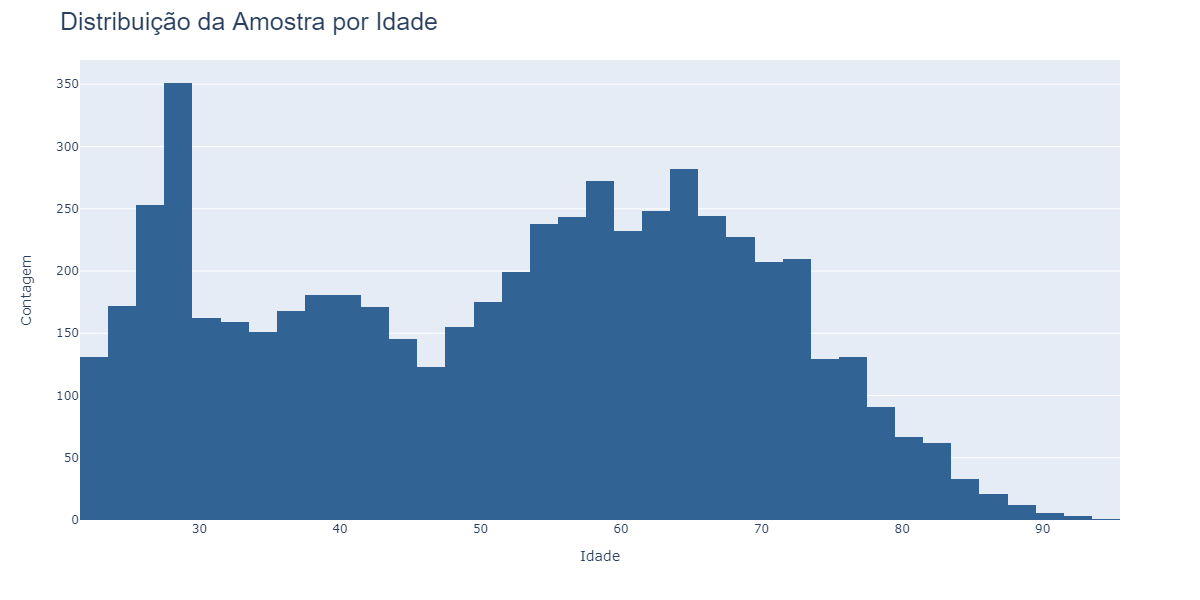

In [29]:
fig = px.histogram(df_p1, 
                   x = 'ppage',
                   color_discrete_sequence = px.colors.qualitative.G10_r)
fig.update_layout(title = 'Distribuição da Amostra por Idade',
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Idade',
                  yaxis_title = 'Contagem',
                  width = 1200,
                  height = 600)
fig.show(renderer = 'png')


### 3.1.2. Distribuição por gênero

In [12]:
p1_gender = df_p1['gender'].value_counts(normalize = True).reset_index()
p1_gender['proportion'] = round((p1_gender['proportion'] * 100), 2)
p1_gender

,gender,proportion
0,Male,50.38
1,Female,49.62


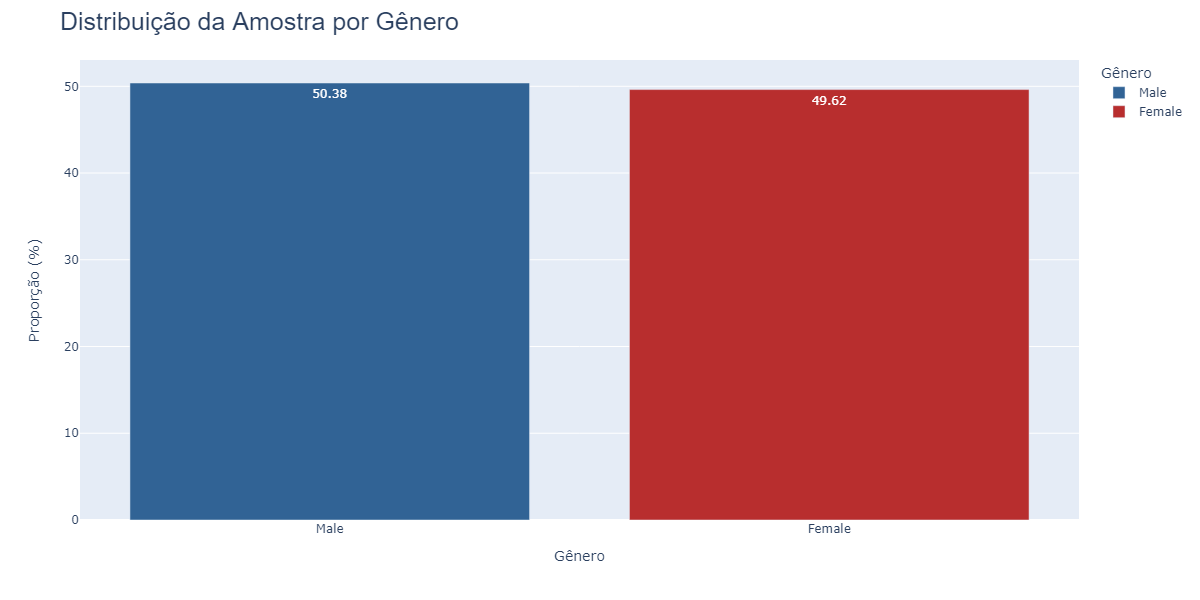

In [42]:
fig = px.bar(p1_gender,
             x = 'gender',
             y = 'proportion',
             color = 'gender',
             text_auto = True,
             labels = {"gender": "Gênero"},
             color_discrete_sequence = px.colors.qualitative.G10_r)
fig.update_layout(title = 'Distribuição da Amostra por Gênero',
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Gênero',
                  yaxis_title = 'Proporção (%)',
                  width = 1200,
                  height = 600)
fig.show(renderer = 'png')

### 3.1.3. Distribuição por raça

In [15]:
p1_race = df_p1['race'].value_counts(normalize=True).reset_index()
p1_race['proportion'] = (p1_race['proportion'] * 100).round(2)
p1_race

,race,proportion
0,White,63.57
1,Black,15.97
2,Hispanic,13.93
3,Other/Mixed,6.53


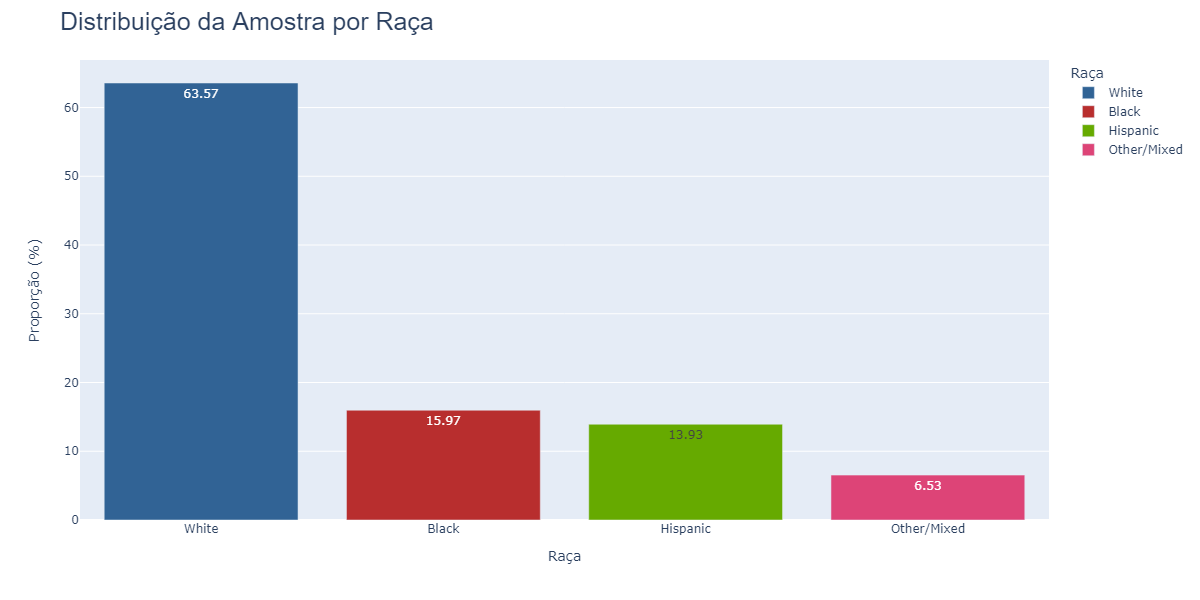

In [43]:
fig = px.bar(p1_race,
             x = 'race',
             y = 'proportion',
             color = 'race',
             text_auto = True,
             labels = {"race": "Raça"},
             color_discrete_sequence = px.colors.qualitative.G10_r)
fig.update_layout(title = 'Distribuição da Amostra por Raça',
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Raça',
                  yaxis_title = 'Proporção (%)',
                  width = 1200,
                  height = 600)
fig.show(renderer = 'png')

### 3.1.4. Distribuição por nível educacional

In [40]:
p1_ed = df_p1['educ'].value_counts(normalize = True).reset_index()
p1_ed['proportion'] = (p1_ed['proportion'] * 100).round(2)
p1_ed

,educ,proportion
0,College,39.92
1,High school or less,30.77
2,Some college,29.30


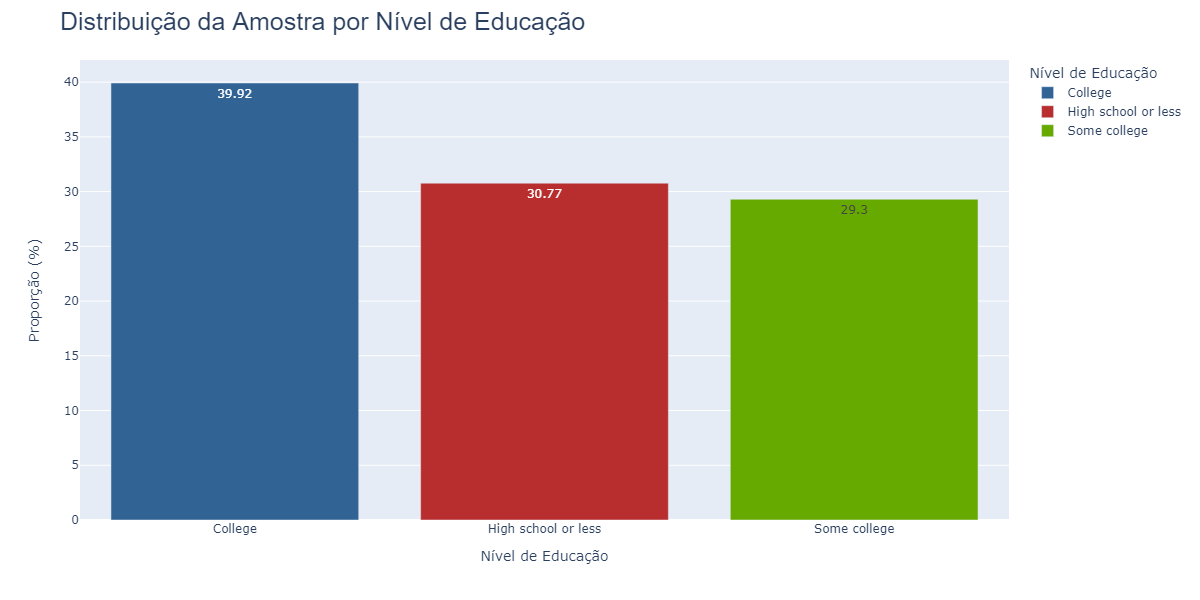

In [44]:
fig = px.bar(p1_ed,
             x = 'educ',
             y = 'proportion',
             color = 'educ',
             text_auto = True,
             labels = {"educ": "Nível de Educação"},
             color_discrete_sequence = px.colors.qualitative.G10_r)
fig.update_layout(title = 'Distribuição da Amostra por Nível de Educação',
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Nível de Educação',
                  yaxis_title = 'Proporção (%)',
                  width = 1200,
                  height = 600)
fig.show(renderer = 'png')

### 3.1.5. Distribuição por faixa de renda 

In [46]:
p1_income = df_p1['income_cat'].value_counts(normalize = True).reset_index()
p1_income['proportion'] = (p1_income['proportion'] * 100).round(2)
p1_income

,income_cat,proportion
0,$75-125k,27.90
1,Less than $40k,24.30
2,$40-75k,23.92
3,$125k or more,23.89


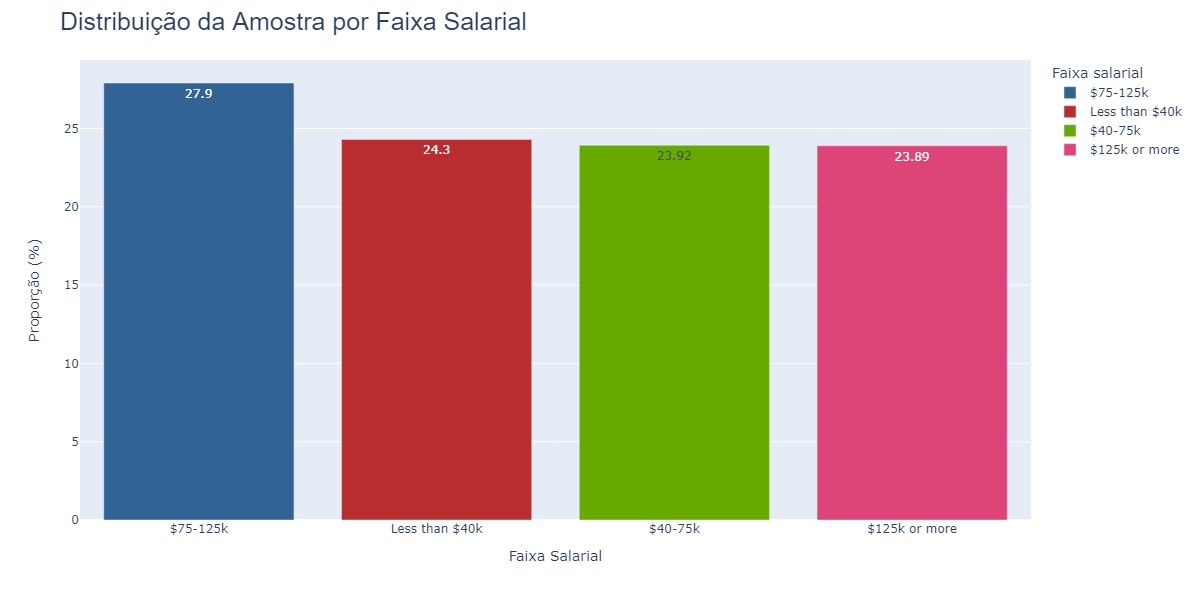

In [48]:
fig = px.bar(p1_income,
             x = 'income_cat',
             y = 'proportion',
             color = 'income_cat',
             text_auto = True,
             labels = {"income_cat": "Faixa salarial"},
             color_discrete_sequence = px.colors.qualitative.G10_r)
fig.update_layout(title = 'Distribuição da Amostra por Faixa Salarial',
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Faixa Salarial',
                  yaxis_title = 'Proporção (%)',
                  width = 1200,
                  height = 600)
fig.show(renderer = 'png')

## Raça x Poder Aquisitivo

In [56]:
income_race = df_p1.groupby(['race', 'income_cat']).agg(count = ('race', 'count')).reset_index().sort_values(by = 'income_cat', ascending = False)
income_race

,race,income_cat,count
3,Black,Less than $40k,334
7,Hispanic,Less than $40k,221
11,Other/Mixed,Less than $40k,79
15,White,Less than $40k,784
2,Black,$75-125k,227
6,Hispanic,$75-125k,231
10,Other/Mixed,$75-125k,100
14,White,$75-125k,1070
1,Black,$40-75k,244
5,Hispanic,$40-75k,203


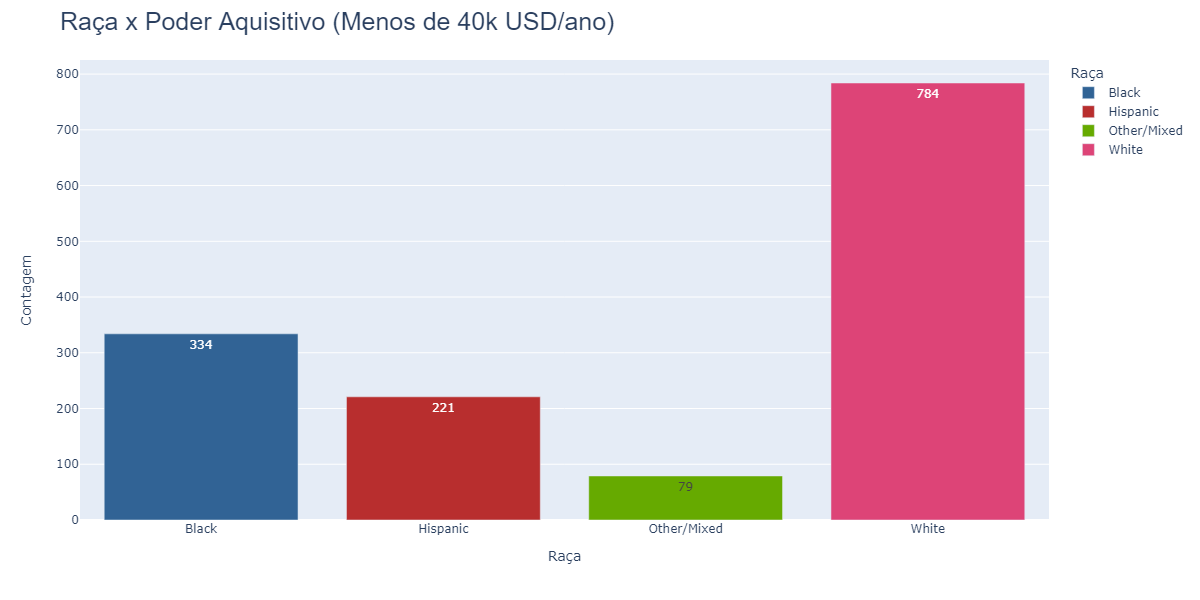

In [59]:
fig = px.bar(income_race[income_race['income_cat'] == 'Less than $40k'],
             x = 'race',
             y = 'count',
             color = 'race',
             text_auto = True,
             labels = {"race": "Raça"},
             color_discrete_sequence = px.colors.qualitative.G10_r)
fig.update_layout(title = 'Raça x Poder Aquisitivo (Menos de 40k USD/ano)',
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Raça',
                  yaxis_title = 'Contagem',
                  width = 1200,
                  height = 600)
fig.show(renderer = 'png')

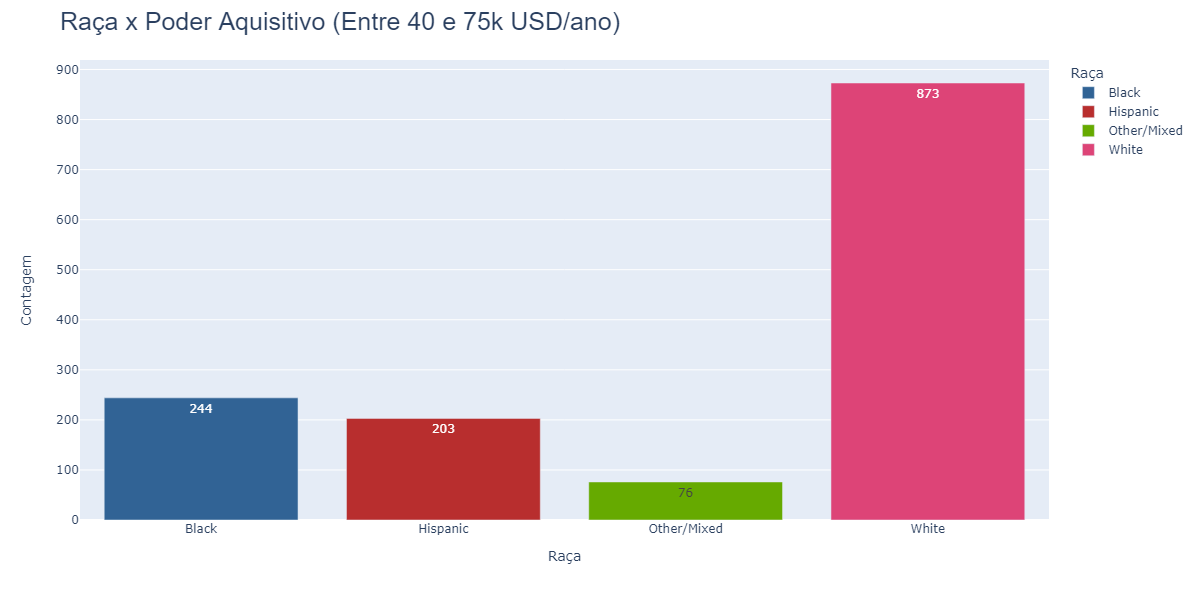

In [64]:
fig = px.bar(income_race[income_race['income_cat'] == '$40-75k'],
             x = 'race',
             y = 'count',
             color = 'race',
             text_auto = True,
             labels = {"race": "Raça"},
             color_discrete_sequence = px.colors.qualitative.G10_r)
fig.update_layout(title = 'Raça x Poder Aquisitivo (Entre 40 e 75k USD/ano)',
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Raça',
                  yaxis_title = 'Contagem',
                  width = 1200,
                  height = 600)
fig.show(renderer = 'png')

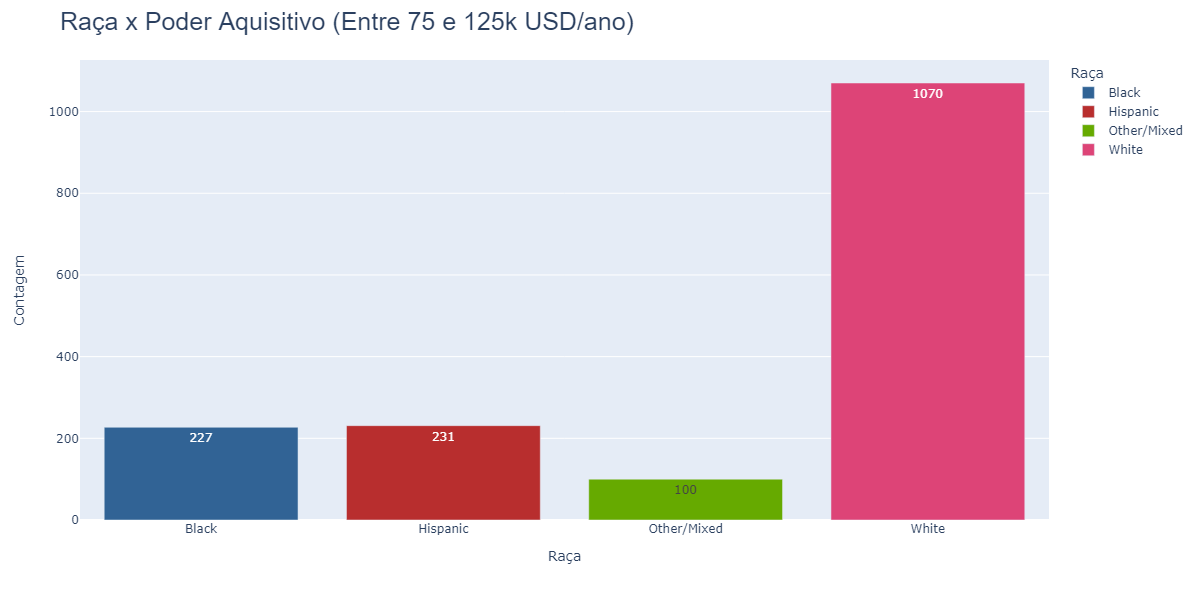

In [61]:
fig = px.bar(income_race[income_race['income_cat'] == '$75-125k'],
             x = 'race',
             y = 'count',
             color = 'race',
             text_auto = True,
             labels = {"race": "Raça"},
             color_discrete_sequence = px.colors.qualitative.G10_r)
fig.update_layout(title = 'Raça x Poder Aquisitivo (Entre 75 e 125k USD/ano)',
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Raça',
                  yaxis_title = 'Contagem',
                  width = 1200,
                  height = 600)
fig.show(renderer = 'png') 

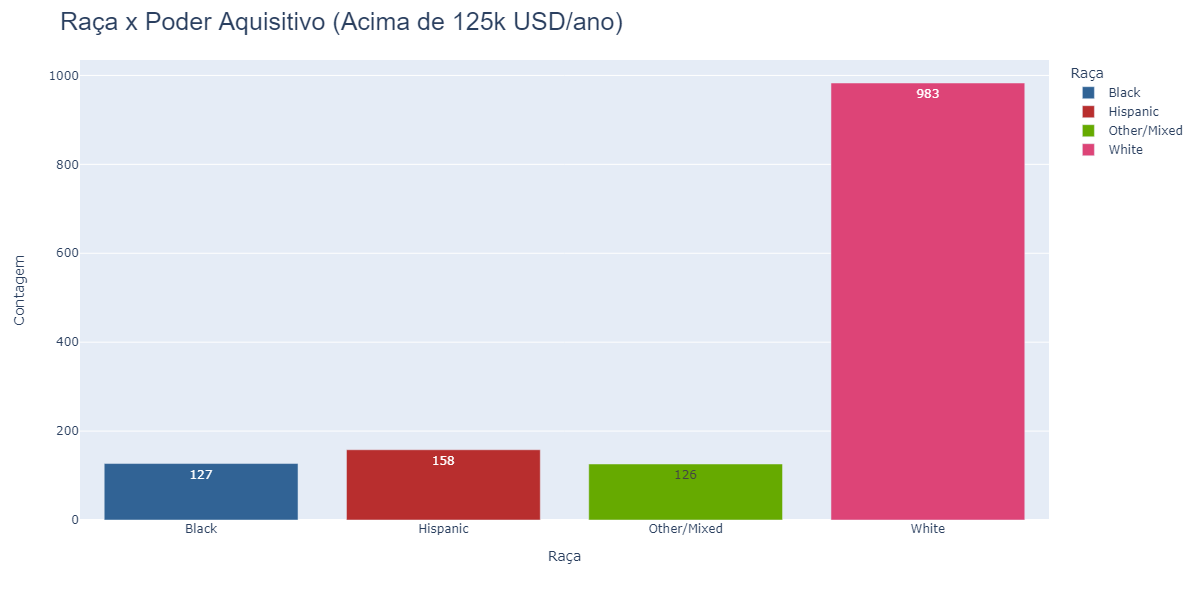

In [63]:
fig = px.bar(income_race[income_race['income_cat'] == '$125k or more'],
             x = 'race',
             y = 'count',
             color = 'race',
             text_auto = True,
             labels = {"race": "Raça"},
             color_discrete_sequence = px.colors.qualitative.G10_r)
fig.update_layout(title = 'Raça x Poder Aquisitivo (Acima de 125k USD/ano)',
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Raça',
                  yaxis_title = 'Contagem',
                  width = 1200,
                  height = 600)
fig.show(renderer = 'png')